In [33]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../eda/cars-data.csv')

df.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


In [35]:
nan_count = df.isna().sum()

print(nan_count)

Unnamed: 0           0
city_mpg             0
class                0
combination_mpg      0
cylinders          124
displacement       124
drive                8
fuel_type            0
highway_mpg          0
make                 0
model                0
transmission         0
year                 0
dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    object 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    object 
 7   fuel_type        719 non-null    object 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    object 
 10  model            719 non-null    object 
 11  transmission     719 non-null    object 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 73.2+ KB


In [37]:
# Convert all 'object' type columns to 'string'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('string')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    string 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    string 
 7   fuel_type        719 non-null    string 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    string 
 10  model            719 non-null    string 
 11  transmission     719 non-null    string 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 73.2 KB


In [38]:
# get y 

y = df['fuel_type'].unique().tolist()

# Replace 'diesel' with 'gas' in the entire DataFrame
df.replace('diesel', 'gas', inplace=True)

y = df['fuel_type'].unique().tolist()

y

['gas', 'electricity']

In [39]:

# Dropping non-numerical and unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [40]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
df[cols] = df[cols].fillna(df[cols].mean())

nan_count = df.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              8
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [41]:
# Replace categorical missing values with mode of the column. check for Nan values again.

df['drive'] = df['drive'].fillna(df['drive'].mode().iloc[0])

nan_count = df.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [42]:
# Using a for loop to replace categorical values with cat codes
cat_cols = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cat_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# Display the altered DataFrame
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,18,2,21,4.0,2.2,2,1,26,24,33,0,1993
1,19,2,22,4.0,2.2,2,1,27,24,33,1,1993
2,16,2,19,6.0,3.0,2,1,22,24,33,0,1993
3,16,2,18,6.0,3.0,2,1,22,24,33,1,1993
4,18,4,21,4.0,2.2,2,1,26,24,33,0,1993


In [43]:
# LOOK AT FIRST ROW
print(df.iloc[0])

city_mpg             18.0
class                 2.0
combination_mpg      21.0
cylinders             4.0
displacement          2.2
drive                 2.0
fuel_type             1.0
highway_mpg          26.0
make                 24.0
model                33.0
transmission          0.0
year               1993.0
Name: 0, dtype: float64


In [44]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
# Resource used: https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed


X = df.drop('fuel_type', axis=1)  # X includes everything except the target column
y = df['fuel_type']  # Y is just the target column

In [45]:
print(X.shape)
print(y.shape)

(719, 11)
(719,)


In [47]:
print(X.iloc[0:11])

    city_mpg  class  combination_mpg  cylinders  displacement  drive  \
0         18      2               21        4.0           2.2      2   
1         19      2               22        4.0           2.2      2   
2         16      2               19        6.0           3.0      2   
3         16      2               18        6.0           3.0      2   
4         18      4               21        4.0           2.2      2   
5         23      0               24        4.0           1.6      2   
6         23      0               26        4.0           1.6      2   
7         23      0               25        4.0           1.8      2   
8         23      0               26        4.0           1.8      2   
9         23      9               25        4.0           1.8      2   
10        21     10               23        4.0           2.0      2   

    highway_mpg  make  model  transmission  year  
0            26    24     33             0  1993  
1            27    24     33     

In [48]:
print(pd.DataFrame(y[0:10]))

   fuel_type
0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1


In [49]:

#NORMALIZE 
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
y=0.1+(y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

In [53]:
import pandas as pd

# If X is a NumPy array, convert it to a DataFrame
df_features = pd.DataFrame(X)

# Add the target variable y to the DataFrame
df_features['fuel_type'] = y.values  # .values will convert the Series to a NumPy array if needed


In [54]:
print(df.describe())

         city_mpg       class  combination_mpg   cylinders  displacement  \
count  719.000000  719.000000       719.000000  719.000000    719.000000   
mean    34.051460    7.634214        35.094576    5.154622      2.760336   
std     32.732968    5.233117        30.071909    1.276406      0.974911   
min      9.000000    0.000000        11.000000    3.000000      1.400000   
25%     16.000000    2.000000        19.000000    4.000000      2.000000   
50%     20.000000    9.000000        22.000000    5.154622      2.760336   
75%     27.000000   12.000000        30.000000    6.000000      3.100000   
max    150.000000   15.000000       136.000000   10.000000      6.200000   

            drive   fuel_type  highway_mpg        make       model  \
count  719.000000  719.000000   719.000000  719.000000  719.000000   
mean     1.815021    0.827538    37.329624   13.137691   73.645341   
std      0.811132    0.378044    26.892826    8.400770   43.532087   
min      0.000000    0.000000    12

In [55]:
print("X CORRELATION:") 
corr = df.corr(); print(corr)                   #COMPUTE CORRELATION OF FEATER MATRIX

X CORRELATION:
                 city_mpg     class  combination_mpg     cylinders  \
city_mpg         1.000000 -0.213484         0.998454 -1.213155e-01   
class           -0.213484  1.000000        -0.222664  1.415416e-01   
combination_mpg  0.998454 -0.222664         1.000000 -1.321393e-01   
cylinders       -0.121316  0.141542        -0.132139  1.000000e+00   
displacement    -0.128895  0.169821        -0.141069  9.217459e-01   
drive           -0.108960 -0.029415        -0.108910  2.397666e-02   
fuel_type       -0.934239  0.172228        -0.938093 -1.723270e-16   
highway_mpg      0.991697 -0.236399         0.997063 -1.442941e-01   
make             0.168306 -0.146960         0.172437 -9.592731e-02   
model            0.115270  0.058427         0.118600 -3.518819e-02   
transmission    -0.240810  0.118692        -0.238849 -1.011991e-01   
year             0.561037 -0.075022         0.566843 -1.142699e-01   

                 displacement     drive     fuel_type  highway_mpg      ma

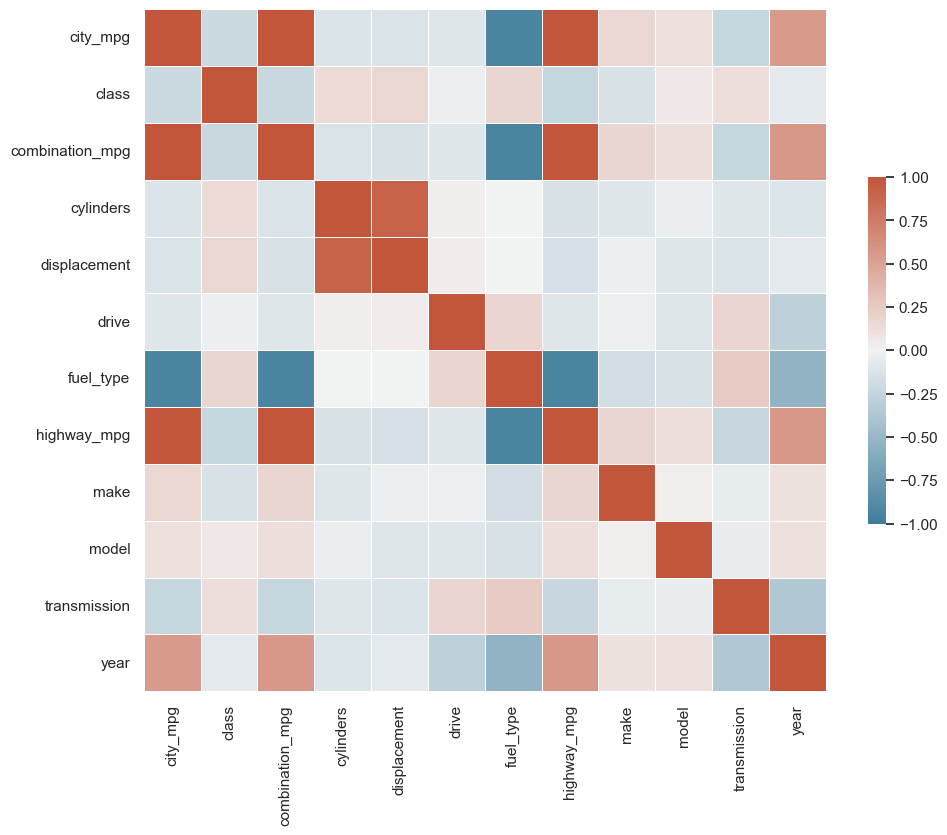

In [56]:
# INSERT CODE TO SHOW A HEAT MAP FOR THE X FEATURES

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


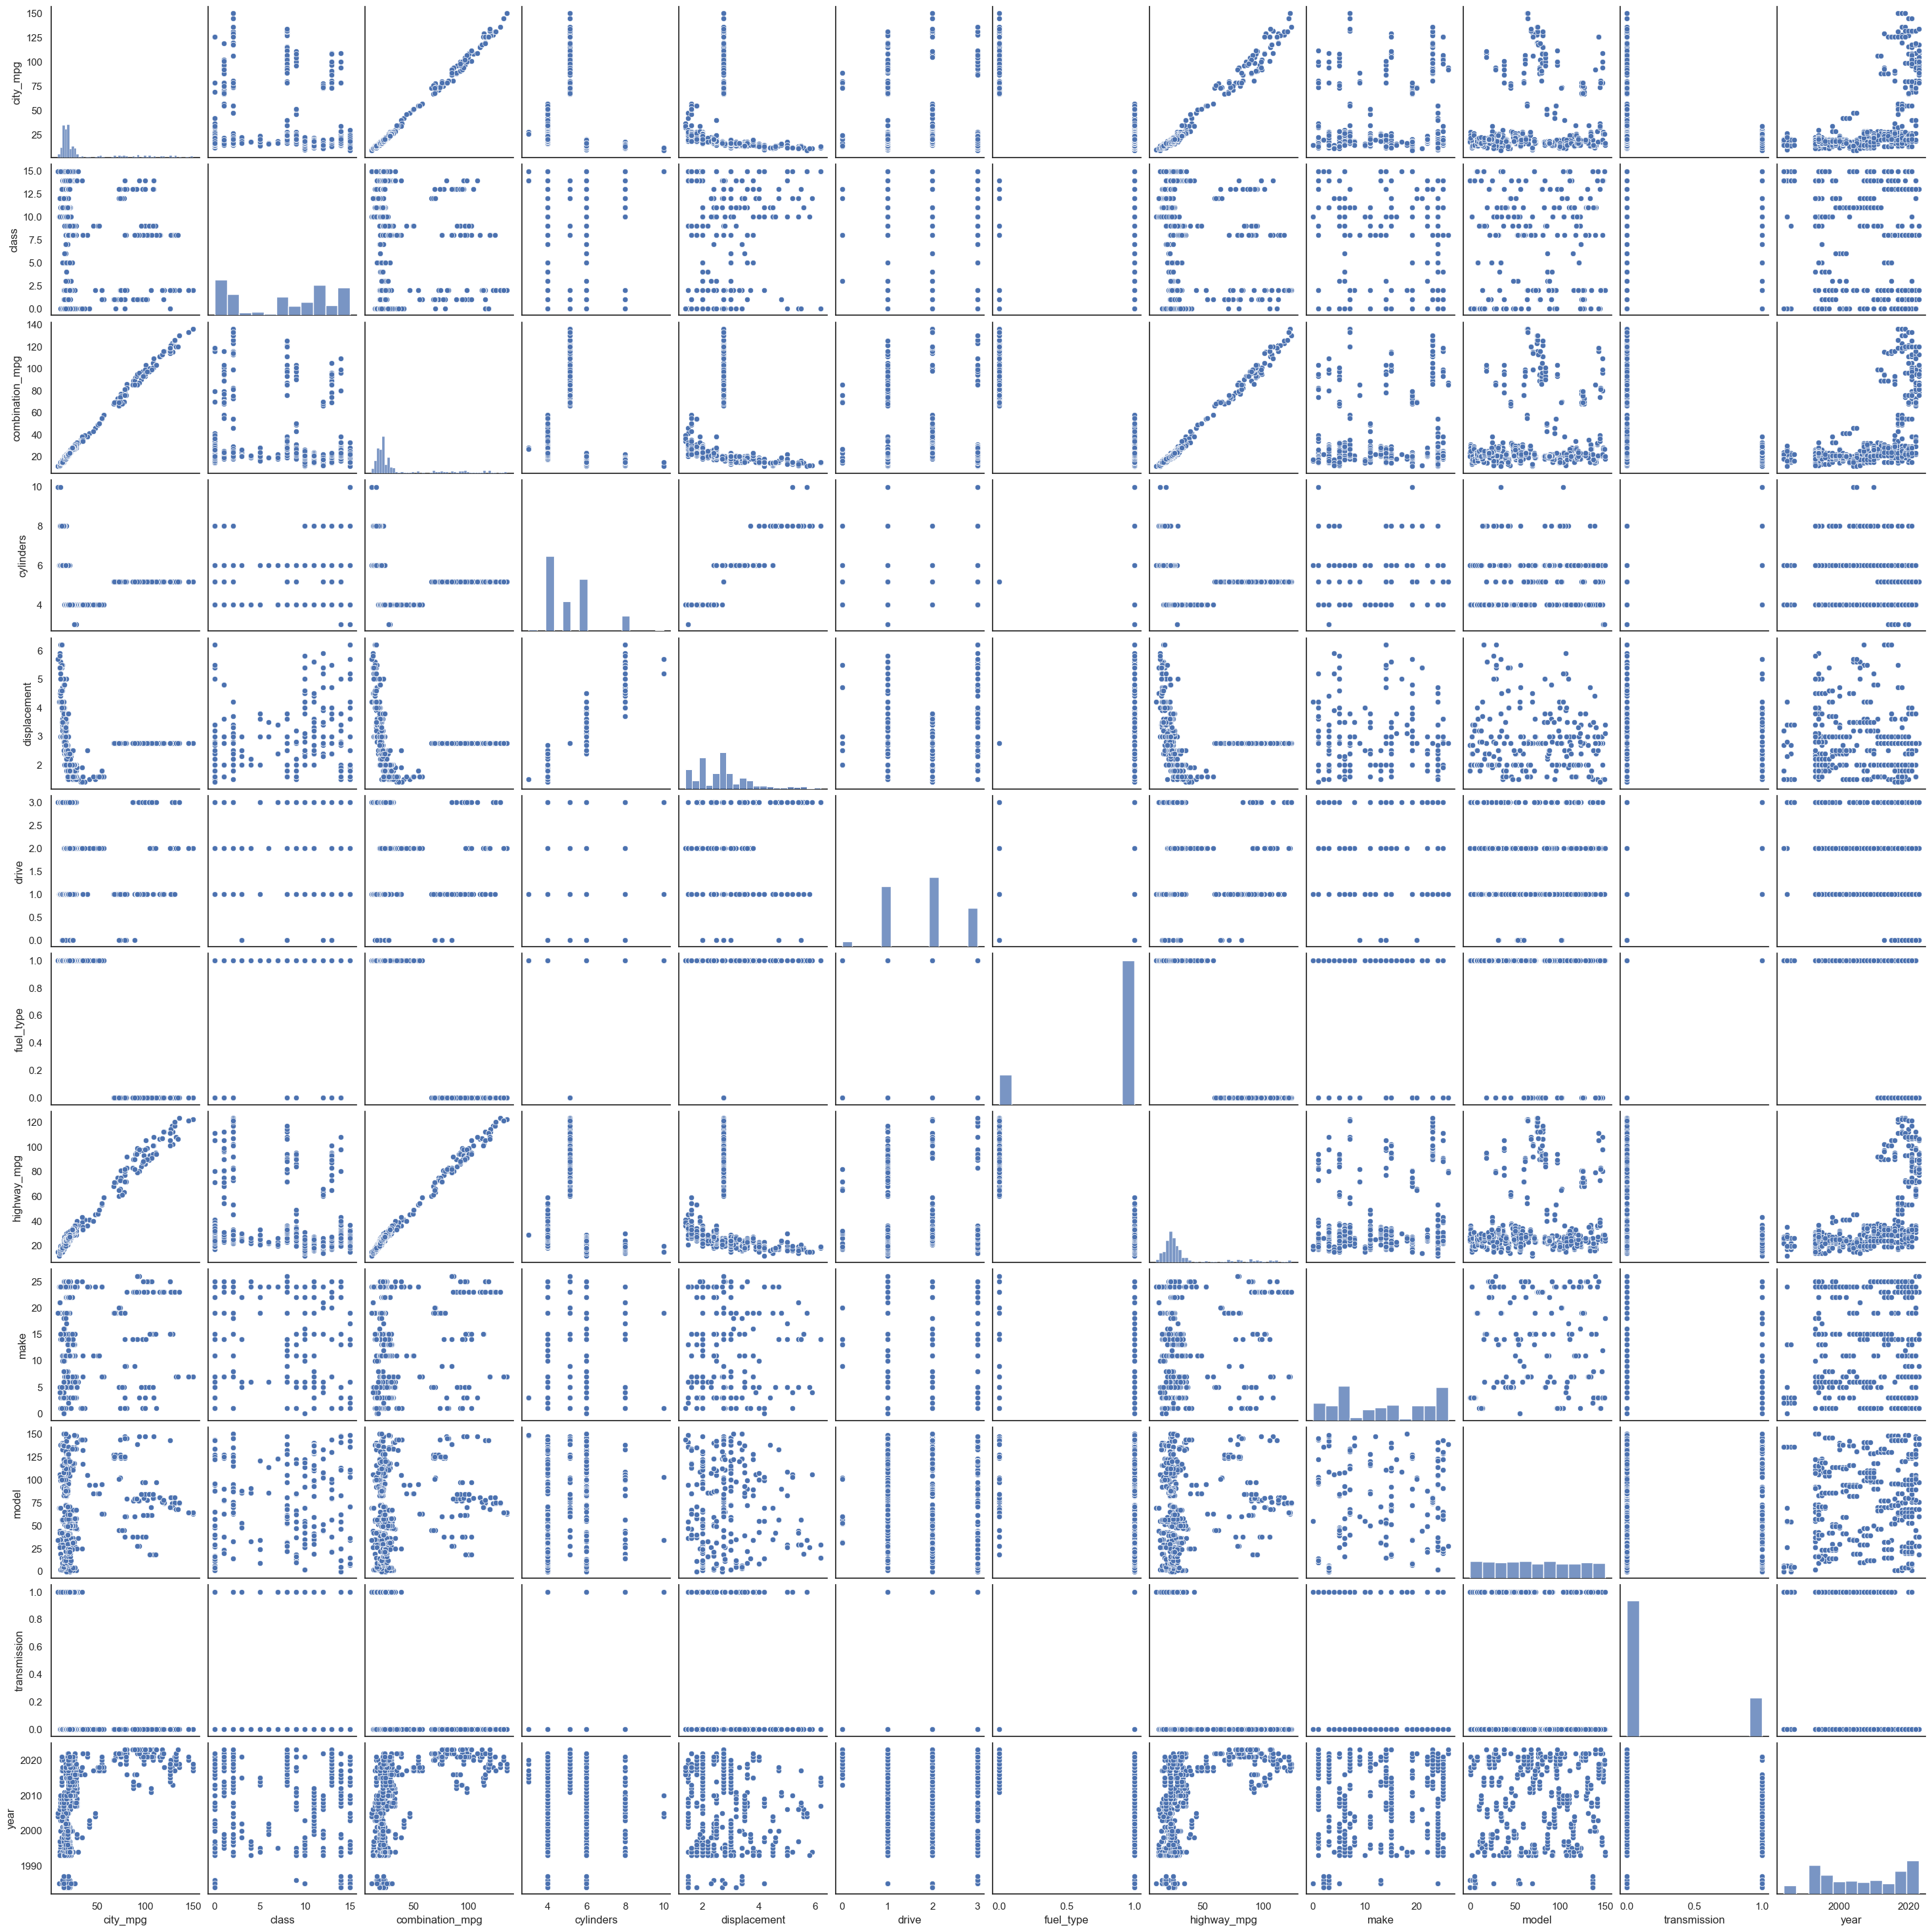

In [57]:
# # # # INSERT CODE TO GENERATE A PAIR-PLOT 
sns.pairplot(df)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is a pandas DataFrame and you want to drop the first two columns
X = X.iloc[:, 2:]  # Select all rows and all columns starting from the third

# Now you can perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# If 'y' is a pandas Series and you want to convert it to a 1D numpy array
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

# Printing shapes and sizes
print("x_train.shape :", x_train.shape)
print("y_train.shape :", y_train.shape)
print("x_test.shape  :", x_test.shape)
print("y_test.shape  :", y_test.shape)


x_train.shape : (575, 9)
y_train.shape : (575,)
x_test.shape  : (144, 9)
y_test.shape  : (144,)


In [60]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(max_depth=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i==1 or i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 1
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 10
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 20
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 30
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15


2 7.69261466121199e-15 7.996207862515092e-15


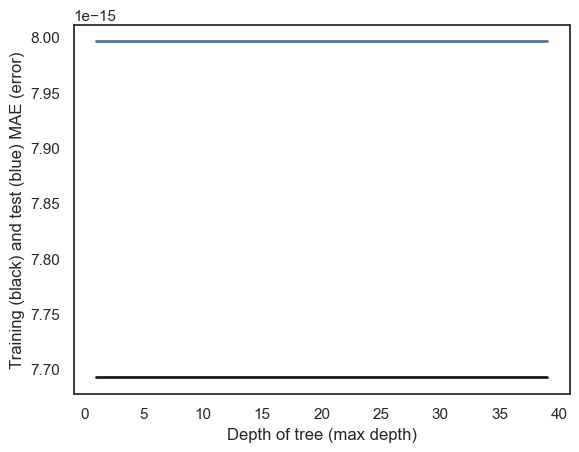

In [61]:
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Depth of tree (max depth)")
plt.ylabel("Training (black) and test (blue) MAE (error)")

i=1
print(hyper_param[i],train_error[i],test_error[i])

In [62]:
# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(2,100):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(min_samples_split=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 10
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 20
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 30
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 40
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 50
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 60
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 70
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 80
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15
hyperparam = 90
 train error: 7.69261466121199e-15
 test error: 7.996207862515092e-15


Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

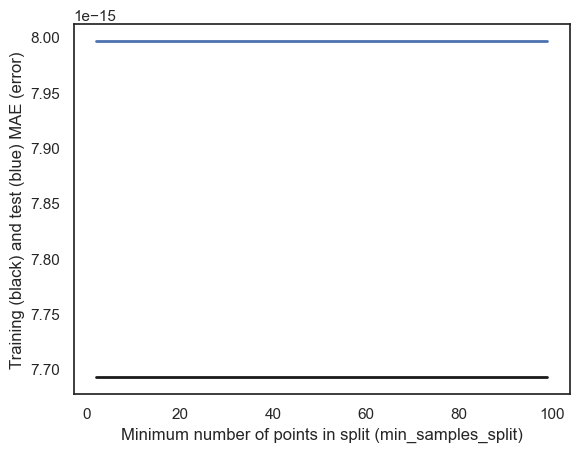

In [63]:
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Minimum number of points in split (min_samples_split)")
plt.ylabel("Training (black) and test (blue) MAE (error)")